In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import re
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Tanya/main_task.xls')

In [3]:
#фиксируем random_seed
RANDOM_SEED = 42

In [4]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


## Cleaning and Prepping Data


Restaurant_id, URL_TA и ID_TA  - столбцы без информации. удалим сразу, чтобы не мешали

In [5]:
df.drop(['Restaurant_id', 'URL_TA', 'ID_TA'], inplace=True, axis=1)

In [6]:
df.isna().sum()

City                     0
Cuisine Style         9283
Ranking                  0
Rating                   0
Price Range          13886
Number of Reviews     2543
Reviews                  0
dtype: int64

### обработка столбца City

In [7]:
df['City'].value_counts()

London        5757
Paris         4897
Madrid        3108
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: City, dtype: int64

### обработка столюца Cuisine Style

In [8]:
df['Cuisine Style']

0                  ['European', 'French', 'International']
1                                                      NaN
2        ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...
3                                                      NaN
4        ['German', 'Central European', 'Vegetarian Fri...
                               ...                        
39995    ['Italian', 'Vegetarian Friendly', 'Vegan Opti...
39996    ['French', 'American', 'Bar', 'European', 'Veg...
39997                                ['Japanese', 'Sushi']
39998    ['Polish', 'European', 'Eastern European', 'Ce...
39999                                          ['Spanish']
Name: Cuisine Style, Length: 40000, dtype: object

Убираем лишние символы из строки и меняем пустые значения на European

In [9]:
def clear_row(row):
    """функция для чистки строки от лишних знаков"""
    a = (['European'])
    if pd.isna(row): return a
    row = row.strip('[]')
    row = row.replace("\'", "")
    row = row.split(', ')
    return row

In [10]:
#очистили строку от лишних символов
df['Cuisine Style'] = df['Cuisine Style'].apply(clear_row)

### обработка столюца Price Range

In [11]:
df['Price Range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price Range, dtype: int64

In [12]:
def replace_price_range(value):
    """функция для избавления от строковых величин в Price_range"""
    if value == '$':
        return 1
    elif value == '$$ - $$$':
        return 2
    elif value == '$$$$':
        return 3
    else:
        return 2

In [13]:
# избавились от строковых данных
df['Price Range'] = df['Price Range'].apply(replace_price_range)

### обработка столбца  Number of Reviews

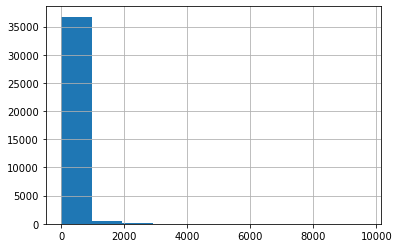

In [14]:
df['Number of Reviews'].hist()

In [15]:
df['Number of Reviews'].fillna(df['Number of Reviews'].mean(), inplace=True)

### обработка столбца  Reviews

In [16]:
df.Reviews[0]

"[['Good food at your doorstep', 'A good hotel restaurant'], ['12/31/2017', '11/20/2017']]"

In [17]:
def find_date(row):
    '''функция для извлечения дат'''
    pattern = re.compile('\d\d\S\d\d\S\d\d\d\d')
    new = pattern.findall(row)
    return new

In [18]:
pattern = re.compile('\d+\/\d+\/\d+')

df['date_rev'] = df['Reviews'].apply(pattern.findall)
df['date_rev'] = df['date_rev'].apply(lambda x: [x[-2], x[-1]] if len(x)>=3 else x)

df['date_rev'] = df['Reviews'].apply(pattern.findall)
df['date_rev'] = df['date_rev'].apply(lambda x: [x[-2], x[-1]] if len(x)>=3 else x)

df['rev_1'] = df['date_rev'].apply(lambda x: x[0] if len(x)>=1 else None)
df['rev_2'] = df['date_rev'].apply(lambda x: x[1] if len(x)==2 else None)

df['rev_1'] = pd.to_datetime(df['rev_1'])
df['rev_2'] = pd.to_datetime(df['rev_2'])

## EDA


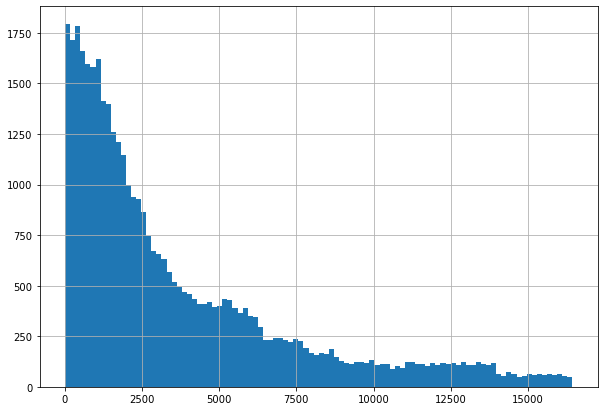

In [19]:
plt.rcParams['figure.figsize'] = (10,7)
df['Ranking'].hist(bins=100)

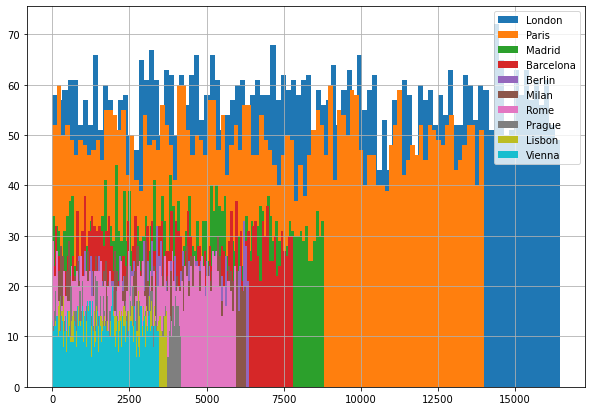

In [20]:
# посмотрим на топ 10 городов
for x in (df['City'].value_counts())[0:10].index:
    df['Ranking'][df['City'] == x].hist(bins=100, label=x)
plt.legend()
plt.show()

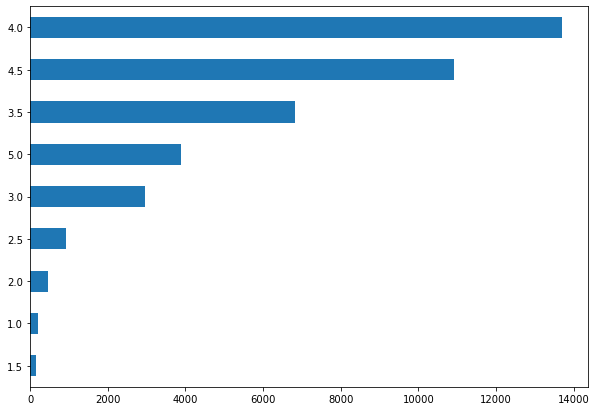

In [21]:
# Посмотрим распределение целевой переменной
df['Rating'].value_counts(ascending=True).plot(kind='barh')

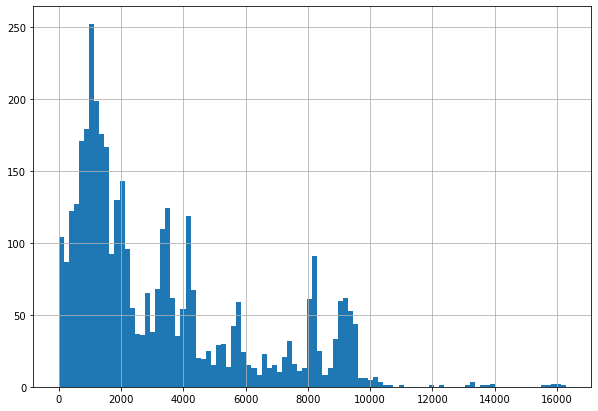

In [22]:
# Посмотрим распределение целевой переменной относительно признака
df['Ranking'][df['Rating'] == 5].hist(bins=100)

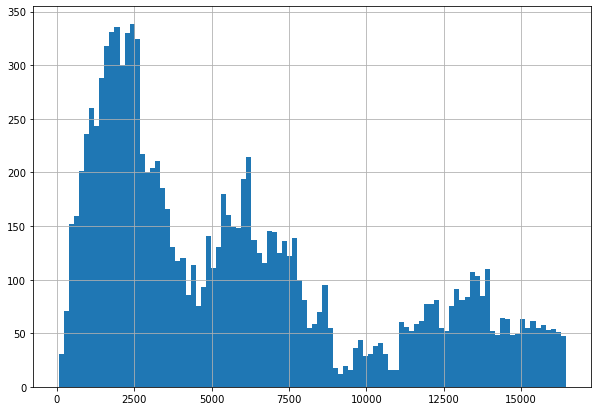

In [23]:
df['Ranking'][df['Rating'] < 4].hist(bins=100)

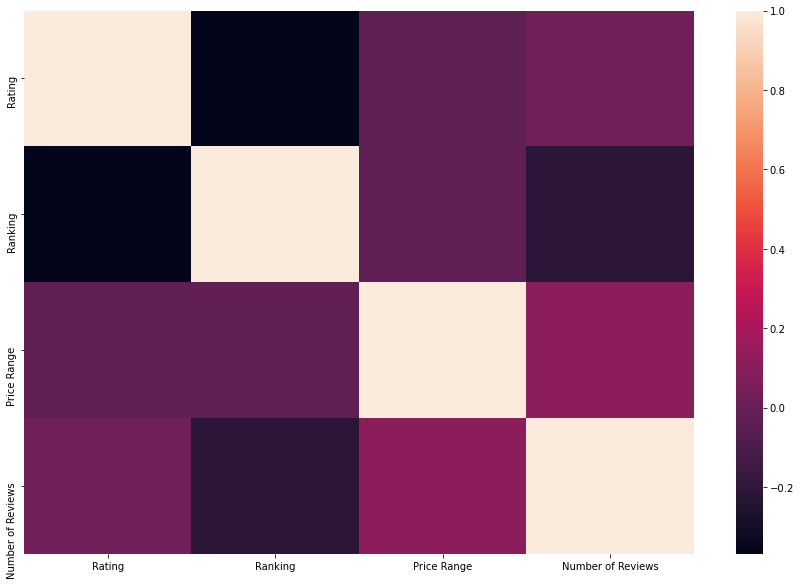

In [24]:
#И один из моих любимых - корреляция признаков
#На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df[['Rating','Ranking','Price Range','Number of Reviews']].corr())

In [25]:
df.corr()

,Ranking,Rating,Price Range,Number of Reviews
Ranking,1.000000,-0.368371,-0.026525,-0.213312
Rating,-0.368371,1.000000,-0.028588,0.027969
Price Range,-0.026525,-0.028588,1.000000,0.112054
Number of Reviews,-0.213312,0.027969,0.112054,1.000000


In [26]:
df.head()

,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,date_rev,rev_1,rev_2
0,Paris,"[European, French, International]",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...","[12/31/2017, 11/20/2017]",2017-12-31,2017-11-20
1,Stockholm,[European],1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...","[07/06/2017, 06/19/2016]",2017-07-06,2016-06-19
2,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...","[01/08/2018, 01/06/2018]",2018-01-08,2018-01-06
3,Berlin,[European],3458.0,5.0,2,3.0,"[[], []]",[],NaT,NaT
4,Munich,"[German, Central European, Vegetarian Friendly]",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...","[11/18/2017, 02/19/2017]",2017-11-18,2017-02-19


## Data Preprocessing

In [27]:
def norm_timedelta(x):
    """функция для нормализации таймдельты"""
    x_min = df.timedelta.min()
    x_max = df.timedelta.max()
    y = (x-x_min)/(x_max-x_min)
    return y 

In [28]:
#нашли разницу между промежуток времени между отзывами
df['timedelta'] = df['rev_1']- df['rev_2']
#дельту дт в инт
df['timedelta'] = abs(df['rev_1']-df['rev_2']).astype('timedelta64[D]')
#нормализовали его
df.timedelta = df.timedelta.apply(norm_timedelta)

In [29]:
df['timedelta'].fillna(df.timedelta.mean(), inplace=True)

In [30]:
df.timedelta.isnull().sum()

0

In [31]:
df.timedelta.mean()

0.04418839423319111

In [32]:
df['timedelta'].fillna(df.timedelta.mean(), inplace=True)

In [33]:
#создали словать с населением городов. почти все цифры отсюда https://all-populations.com/
population = {'London': 9095459 ,'Paris': 2148327,'Madrid': 3266126, 'Barcelona': 1593075, 'Berlin': 3326002, 'Milan': 1331586,
             'Rome': 2870493, 'Prague': 1324277, 'Lisbon': 517802, 'Vienna': 1911191, 'Amsterdam': 869709, 'Brussels': 11657845,
             'Hamburg': 1718187, 'Munich': 1364920, 'Lyon': 496343, 'Stockholm': 1981263, 'Budapest': 1744665,
             'Warsaw': 1720398, 'Dublin': 506211, 'Copenhagen': 1246611, 'Athens': 3168846, 'Edinburgh': 468070,
             'Zurich': 402275, 'Oporto': 221800, 'Geneva': 196150, 'Krakow': 756183, 'Oslo': 673469, 'Helsinki': 574579,
             'Bratislava': 413192, 'Luxembourg': 76420, 'Ljubljana': 277554 }

#создали столбец с населением городов, в которых находятся рестораны
df['Population'] = df['City'].apply(lambda x: population[x])

In [34]:
#создали словарь с площадью городов. вся информация из википедии
square = {'London': 607 ,'Paris': 40.7,'Madrid': 233.3, 'Barcelona': 39.34, 'Berlin': 344.3, 'Milan': 70.18,
             'Rome': 496, 'Prague': 191.5, 'Lisbon': 38.63, 'Vienna': 160.1, 'Amsterdam': 84.68, 'Brussels': 12.59,
             'Hamburg': 291.6, 'Munich': 119.9, 'Lyon': 18.48, 'Stockholm': 72.59, 'Budapest': 202.8,
             'Warsaw': 199.7, 'Dublin': 45.48, 'Copenhagen': 34.07, 'Athens': 15.04, 'Edinburgh': 101.9,
             'Zurich': 33.93, 'Oporto': 15.99, 'Geneva': 6.151, 'Krakow': 126.3, 'Oslo': 175.3, 'Helsinki': 82.53,
             'Bratislava': 141.9, 'Luxembourg': 998, 'Ljubljana': 63.24 }
#создали столбец с площадью городов, где находятся рестораны
df['Square'] = df['City'].apply(lambda x: square[x])

In [35]:
# посчитали сколько ресторанов в каждом городе
city_count = df.groupby('City').City.count().to_dict()

In [36]:
#создали столбец с количеством ресторанов в городе
df['R_count'] = df['City'].apply(lambda x: city_count[x])

In [37]:
#создали столбец с соотношением количества жителей на 1 ресторан
df['p_count_for_1r'] = df['Population'] / df['R_count']

In [38]:
#создали столбец с плотностью населения
df['Density'] = df['Population']/df['Square']

In [39]:
#добавляем столбец Средний рейтинг ресторана по городу
avg_r_in_c = df.groupby('City').Rating.mean().to_dict()
df['avg_r_in_c'] = df['City'].apply(lambda x: avg_r_in_c[x])

In [40]:
#добавляем столбец c соотношением населения города к количеству отзывов по ресторанам
df['pop_to_reviews'] = df['Population'] / df['Number of Reviews']

In [41]:
#Добавили столбец с количеством кухонь в ресторане
df['sum_cs'] = df['Cuisine Style'].apply(lambda x: len(str(x).split(',')))

In [42]:
# создали дамми переменные из столбца City
city_dummies = pd.get_dummies(df['City'], prefix='City')
# приклеиваем к датафрейму
df = pd.concat([df,city_dummies], axis=1)

In [43]:
#сделали даммиd переменные для кухонь
cuisine_dummies = pd.get_dummies(df['Cuisine Style'].apply(pd.Series).stack()).sum(level=0)
cuisine_dummies.drop(cuisine_dummies.columns[[0]], axis=1, inplace = True)
#приклеим их к датафрейму
df = pd.concat([df,cuisine_dummies], axis=1)

In [44]:
df.head()

,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,date_rev,rev_1,rev_2,...,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan
0,Paris,"[European, French, International]",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...","[12/31/2017, 11/20/2017]",2017-12-31,2017-11-20,...,0,0,0,0,0,0,0,0,0,0
1,Stockholm,[European],1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...","[07/06/2017, 06/19/2016]",2017-07-06,2016-06-19,...,0,0,0,0,0,0,0,0,0,0
2,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...","[01/08/2018, 01/06/2018]",2018-01-08,2018-01-06,...,0,0,1,1,0,0,0,0,0,0
3,Berlin,[European],3458.0,5.0,2,3.0,"[[], []]",[],NaT,NaT,...,0,0,0,0,0,0,0,0,0,0
4,Munich,"[German, Central European, Vegetarian Friendly]",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...","[11/18/2017, 02/19/2017]",2017-11-18,2017-02-19,...,0,0,0,1,0,0,0,0,0,0


In [45]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
    # Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)  
X = df.drop(['Cuisine Style','Price Range','Reviews',
         'Rating','City','rev_1', 'rev_2', 'date_rev'], axis=1)
y = df['Rating']
      
    # Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
      
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
    # Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [46]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
    # Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
    # Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
    # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
    # Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  

MAE: 0.20725124999999997
